# Step 2: Account_Clustering
Exploring Data Vizualization and Clustering Approaches of Account Features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn import preprocessing
#from scipy.stats import shapiro
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from google.cloud import bigquery
from google.oauth2 import service_account

In [2]:
df=pd.read_csv('../../Data/test_Account_Features_Data')

In [3]:
df.head()

,Account Hash,Sum of XRP Received,Sum of XRP Sent,Sum of Fees,Txn Count
0,rGvEQcqMNRKX8aTSdBSVRNko7EUj3bafK5,126141560,106141548,12,2.0
1,rrnPsa6CofSnkiYKrLm5ufU7y5douZArci,6140577419,6140577407,12,4.0
2,rnAskd3KAp1JoNwYtCmTrFskcHP2H1rcUP,3000000000,0,0,3.0
3,r3J1aP6urzpvpgtp6g4QTi4ywMqfqXURQw,0,5224000000,20,2.0
4,rHxtRRUMVAnPZUyRgXhRSyWZ2MrHx8AvVs,64969233965,96433716800,247130,243.0


In [4]:
df.describe()

,Sum of XRP Received,Sum of XRP Sent,Sum of Fees,Txn Count
count,4.747800e+04,4.747800e+04,4.747800e+04,47478.000000
mean,1.865312e+11,1.865312e+11,8.745145e+05,29.790345
std,6.151254e+12,6.758265e+12,1.170199e+08,1594.313641
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,3.206544e+06,0.000000e+00,0.000000e+00,1.000000
50%,4.999800e+08,0.000000e+00,0.000000e+00,1.000000
75%,3.636879e+09,6.500000e+08,2.000000e+01,3.000000
max,6.740783e+14,8.020789e+14,2.354639e+10,247552.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47478 entries, 0 to 47477
Data columns (total 5 columns):
Account Hash           47478 non-null object
Sum of XRP Received    47478 non-null int64
Sum of XRP Sent        47478 non-null int64
Sum of Fees            47478 non-null int64
Txn Count              47478 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.8+ MB


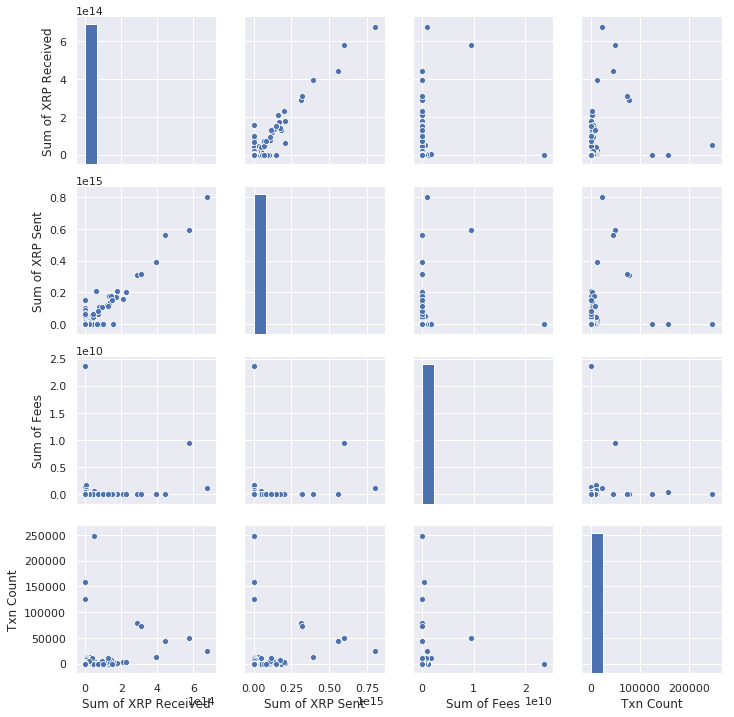

In [6]:
sns.pairplot(df)

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


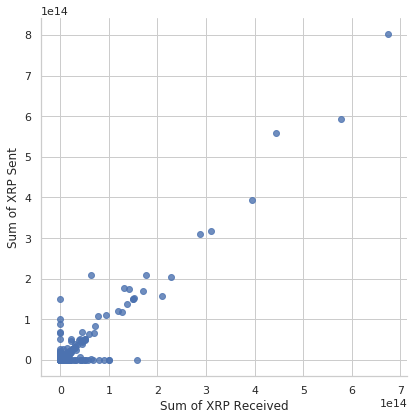

In [10]:
sns.set_style('whitegrid')
sns.lmplot('Sum of XRP Received','Sum of XRP Sent',data=df,
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [14]:
np.linspace(0,len(df['Sum of Fees']))

array([    0.        ,   968.93877551,  1937.87755102,  2906.81632653,
        3875.75510204,  4844.69387755,  5813.63265306,  6782.57142857,
        7751.51020408,  8720.44897959,  9689.3877551 , 10658.32653061,
       11627.26530612, 12596.20408163, 13565.14285714, 14534.08163265,
       15503.02040816, 16471.95918367, 17440.89795918, 18409.83673469,
       19378.7755102 , 20347.71428571, 21316.65306122, 22285.59183673,
       23254.53061224, 24223.46938776, 25192.40816327, 26161.34693878,
       27130.28571429, 28099.2244898 , 29068.16326531, 30037.10204082,
       31006.04081633, 31974.97959184, 32943.91836735, 33912.85714286,
       34881.79591837, 35850.73469388, 36819.67346939, 37788.6122449 ,
       38757.55102041, 39726.48979592, 40695.42857143, 41664.36734694,
       42633.30612245, 43602.24489796, 44571.18367347, 45540.12244898,
       46509.06122449, 47478.        ])

In [16]:
df['Sum of Fees'].describe()

count    4.747800e+04
mean     8.745145e+05
std      1.170199e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+01
max      2.354639e+10
Name: Sum of Fees, dtype: float64

In [18]:
def log_transform_df(dat):
    return dat.apply(np.log)

Turn sum of Fees in to classes??
noFee (==0)
smFee (>0 and <=10)
mdFee (>10 and <=20)
large fee (>20)

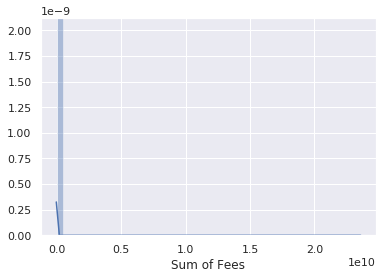

In [17]:
sns.distplot(df['Sum of Fees'])

In [13]:
kmeans = KMeans(n_clusters=4)

In [15]:
kmeans.fit(df.drop('Account Hash',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
kmeans.cluster_centers_

array([[8.02557284e+10, 6.94070741e+10, 6.53800290e+05, 2.29856071e+01],
       [5.65379424e+14, 6.51422199e+14, 3.48316767e+09, 3.93073333e+04],
       [1.30993626e+14, 1.43621491e+14, 2.34771517e+06, 2.28138889e+03],
       [3.31216426e+14, 3.41010474e+14, 1.00029333e+06, 5.48800000e+04]])